In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train = pd.read_csv('train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [64]:
train.shape

(45528, 19)

In [65]:
train.duplicated().sum()

0

In [66]:
train.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [67]:
train['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [69]:
test = pd.read_csv('test.csv')
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [70]:
test.shape

(11383, 18)

In [71]:
test.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [72]:
train['customer_id'].nunique()

45528

In [73]:
combinded = pd.concat([train, test], axis = 0)
combinded.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1.0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0.0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0.0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0.0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0.0


In [74]:
combinded.shape

(56911, 19)

In [75]:
combinded['customer_id'].nunique()

56911

In [76]:
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_159072'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_103875'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_154768'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_163551'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_125741'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_114662'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_163225'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_160336'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_148377'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_159400'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_107047'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_130068'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_136199'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_114286'])
combinded = combinded.drop(combinded.index[combinded['customer_id'] == 'CST_100928'])

combinded.shape

(56896, 19)

In [77]:
combinded.isnull().sum()

customer_id                    0
name                           0
age                            0
gender                         0
owns_car                     670
owns_house                     0
no_of_children               950
net_yearly_income              0
no_of_days_employed          564
occupation_type                0
total_family_members         112
migrant_worker               112
yearly_debt_payments         117
credit_limit                   0
credit_limit_used(%)           0
credit_score                  11
prev_defaults                  0
default_in_last_6months        0
credit_card_default        11383
dtype: int64

In [78]:
combinded['migrant_worker'] = combinded['migrant_worker'].replace({1.0: 'Y', 0.0 : 'N'})
combinded['migrant_worker'].value_counts()

N    46628
Y    10156
Name: migrant_worker, dtype: int64

In [79]:
x = ['no_of_children', 'total_family_members']
for i in x:
    combinded[i] = combinded[i].fillna(combinded[i].value_counts().index[0])

In [80]:
x = ['credit_score', 'yearly_debt_payments', 'no_of_days_employed']
for i in x:
    combinded[i] = combinded[i].fillna(combinded[i].mean())

In [81]:
combinded['owns_car'] = combinded['owns_car'].fillna('No data')

In [82]:
combinded['migrant_worker'] = combinded['migrant_worker'].fillna('No data')

In [83]:
combinded.isnull().sum()

customer_id                    0
name                           0
age                            0
gender                         0
owns_car                       0
owns_house                     0
no_of_children                 0
net_yearly_income              0
no_of_days_employed            0
occupation_type                0
total_family_members           0
migrant_worker                 0
yearly_debt_payments           0
credit_limit                   0
credit_limit_used(%)           0
credit_score                   0
prev_defaults                  0
default_in_last_6months        0
credit_card_default        11383
dtype: int64

In [84]:
train1 = combinded.iloc[0:45513, :]
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45513 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45513 non-null  object 
 1   name                     45513 non-null  object 
 2   age                      45513 non-null  int64  
 3   gender                   45513 non-null  object 
 4   owns_car                 45513 non-null  object 
 5   owns_house               45513 non-null  object 
 6   no_of_children           45513 non-null  float64
 7   net_yearly_income        45513 non-null  float64
 8   no_of_days_employed      45513 non-null  float64
 9   occupation_type          45513 non-null  object 
 10  total_family_members     45513 non-null  float64
 11  migrant_worker           45513 non-null  object 
 12  yearly_debt_payments     45513 non-null  float64
 13  credit_limit             45513 non-null  float64
 14  credit_limit_used(%)  

<AxesSubplot:>

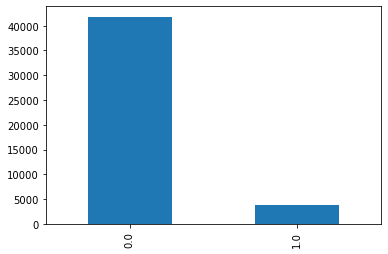

In [91]:
train1['credit_card_default'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='owns_house'>

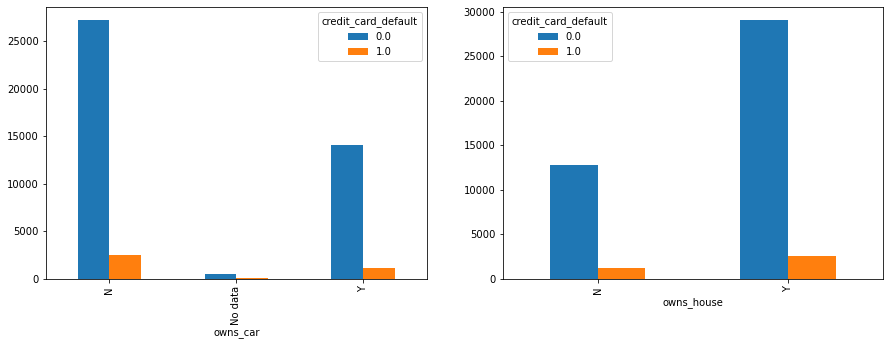

In [92]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train1['owns_car'], train1['credit_card_default']).plot.bar(ax=ax[0])
pd.crosstab(train1['owns_house'], train1['credit_card_default']).plot.bar(ax=ax[1])

<AxesSubplot:xlabel='default_in_last_6months'>

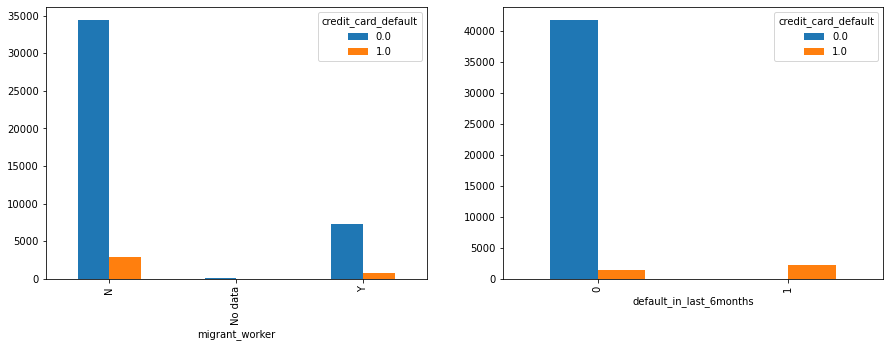

In [86]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train1['migrant_worker'], train1['credit_card_default']).plot.bar(ax=ax[0])
pd.crosstab(train1['default_in_last_6months'], train1['credit_card_default']).plot.bar(ax=ax[1])

<AxesSubplot:xlabel='prev_defaults'>

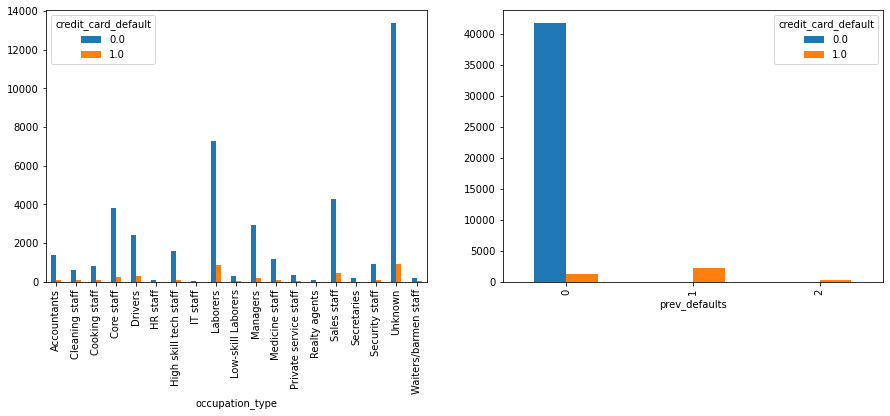

In [89]:
f,ax = plt.subplots(1,2,figsize=(15,5))
pd.crosstab(train1['occupation_type'], train1['credit_card_default']).plot.bar(ax=ax[0])
pd.crosstab(train1['prev_defaults'], train1['credit_card_default']).plot.bar(ax=ax[1])

In [90]:
default = train1[train1['credit_card_default'] == 1]

In [100]:
categorical_variables = default[['prev_defaults', 'migrant_worker', 'default_in_last_6months', 'owns_car']]

D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\E\Data Scientist

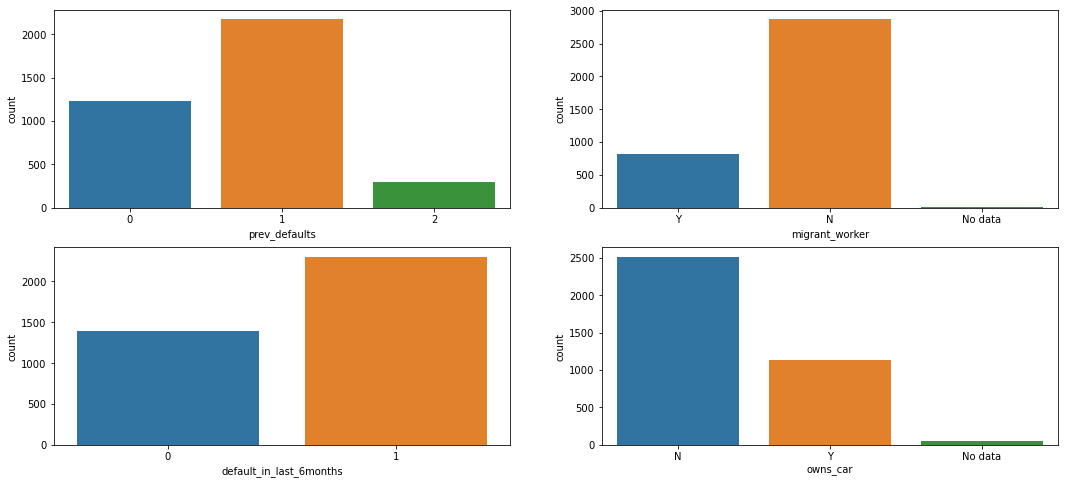

In [102]:
fig, ax = plt.subplots(2, 2, figsize = (18,8))
for i, subplot in zip(categorical_variables, ax.flatten()):
    sns.countplot(default[i], ax = subplot)

D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

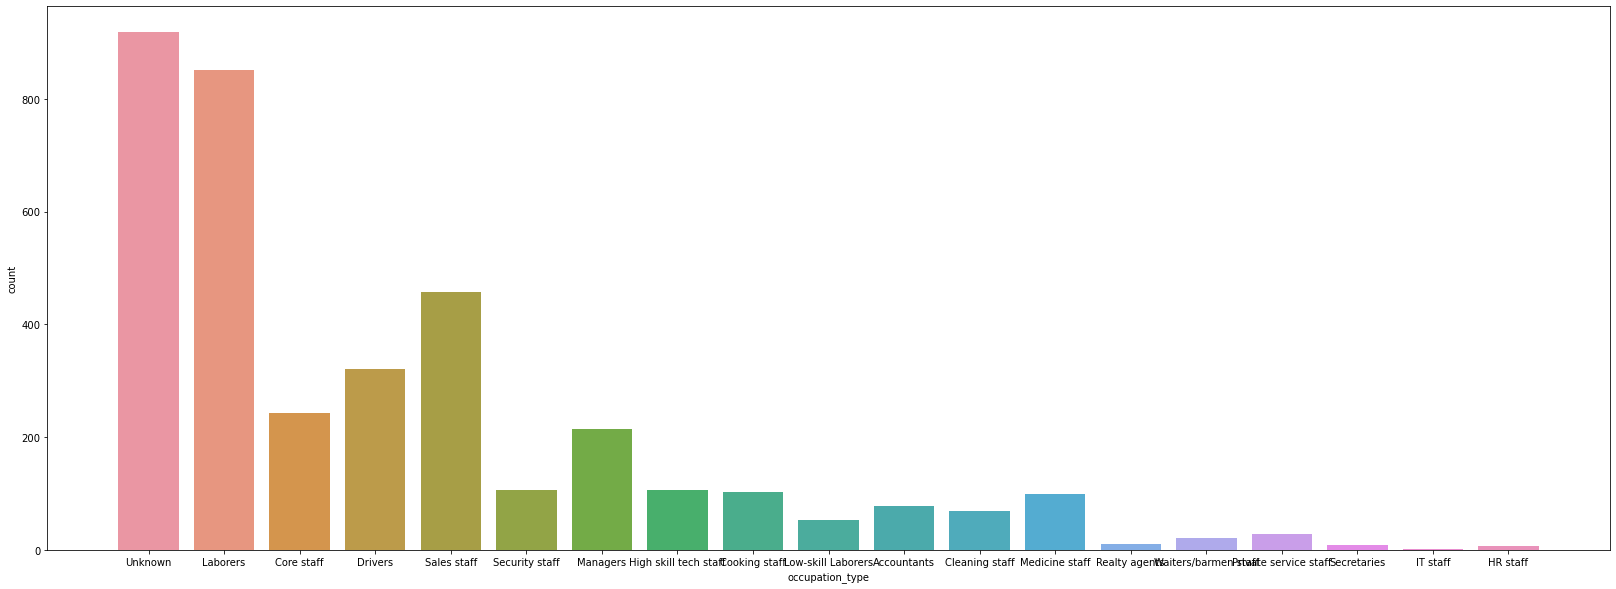

In [131]:
plt.figure(figsize= (28,10))
sns.countplot(default['occupation_type']).plot(kind = 'bar')

D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

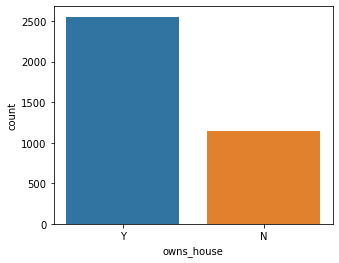

In [114]:
plt.figure(figsize= (5,4))
sns.countplot(default['owns_house']).plot(kind = 'bar')

In [115]:
no_default = train1[train1['credit_card_default'] == 0]

In [123]:
categorical_variables = default[['migrant_worker', 'default_in_last_6months', 'owns_car', 'owns_house']]

D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\E\Data Scientist

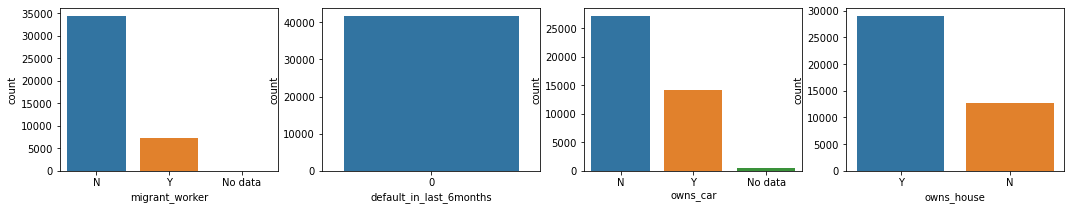

In [124]:
fig, ax = plt.subplots(1, 4, figsize = (18,3))
for i, subplot in zip(categorical_variables, ax.flatten()):
    sns.countplot(no_default[i], ax = subplot)

D:\E\Data Scientist\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

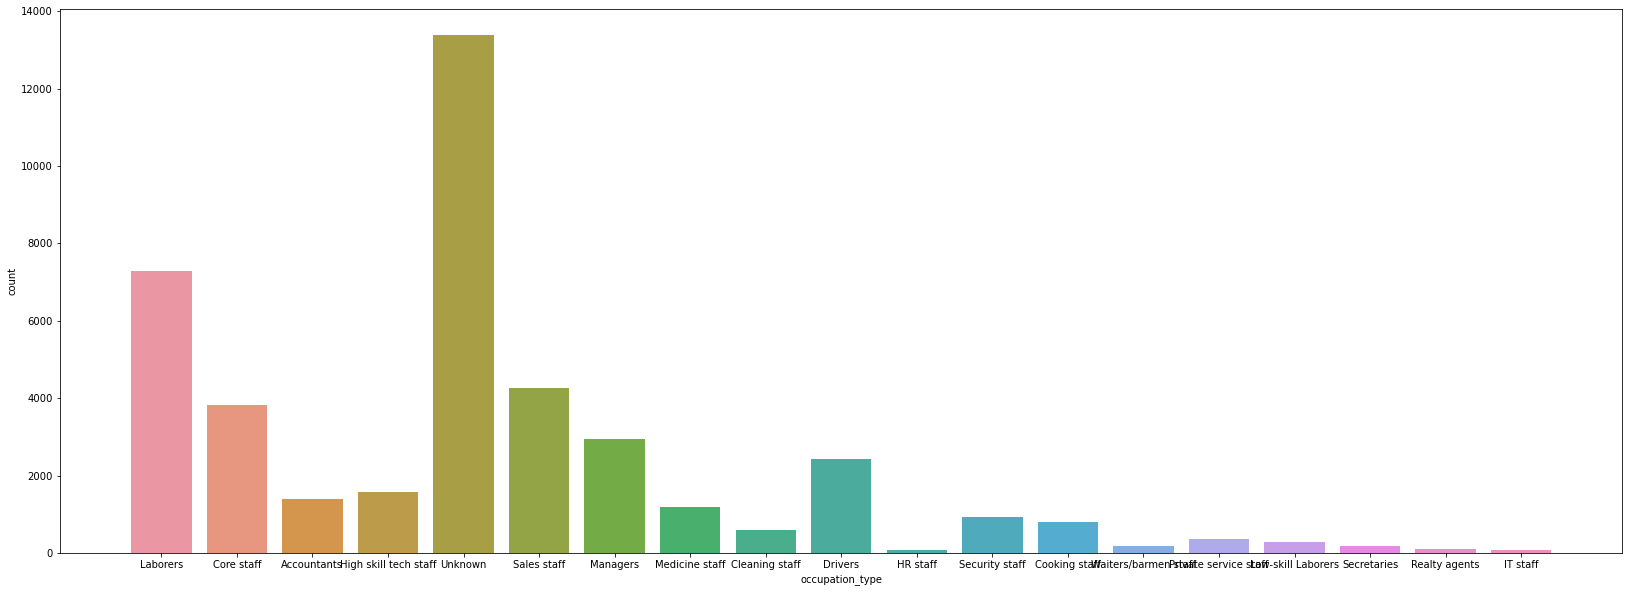

In [130]:
plt.figure(figsize= (28,10))
sns.countplot(no_default['occupation_type']).plot(kind = 'bar')

In [133]:
no_default['prev_defaults'].value_counts()

0    41816
Name: prev_defaults, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
x = ['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker']
for i in x:
    combinded[i] = le.fit_transform(combinded[i])

In [25]:
combinded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56896 entries, 0 to 11382
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              56896 non-null  object 
 1   name                     56896 non-null  object 
 2   age                      56896 non-null  int64  
 3   gender                   56896 non-null  int32  
 4   owns_car                 56896 non-null  int32  
 5   owns_house               56896 non-null  int32  
 6   no_of_children           56896 non-null  float64
 7   net_yearly_income        56896 non-null  float64
 8   no_of_days_employed      56896 non-null  float64
 9   occupation_type          56896 non-null  int32  
 10  total_family_members     56896 non-null  float64
 11  migrant_worker           56896 non-null  int32  
 12  yearly_debt_payments     56896 non-null  float64
 13  credit_limit             56896 non-null  float64
 14  credit_limit_used(%)  

In [26]:
combinded.shape

(56896, 19)

In [27]:
56896-11383

45513

In [28]:
newtrain = combinded.iloc[0:45513, :]
newtest = combinded.iloc[45513:, :]

In [29]:
newtrain.shape

(45513, 19)

In [30]:
newtest = newtest.drop('credit_card_default', axis = 1)
newtest.shape

(11383, 18)

In [31]:
newtrain = newtrain.drop(['customer_id', 'name'], axis = 1)
newtest = newtest.drop(['customer_id', 'name'], axis = 1)

In [32]:
from sklearn.metrics import f1_score

In [33]:
x = newtrain.drop('credit_card_default', axis = 1)
y = newtrain['credit_card_default']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 ,random_state = 1)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(f1_score(y_test, y_pred))

0.7130681818181819


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
etree = ExtraTreesClassifier()
y_pred = etree.fit(x_train, y_train).predict(x_test)
print(f1_score(y_test, y_pred))

0.8648648648648648


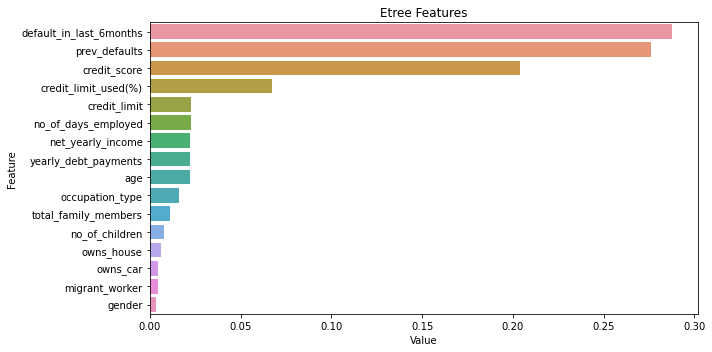

In [48]:
feature_imp = pd.DataFrame(sorted(zip(etree.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Etree Features')
plt.tight_layout()
plt.show()

In [59]:
x_train = newtrain.drop('credit_card_default', axis = 1)
y_train = newtrain['credit_card_default']
x_test = newtest
from sklearn.ensemble import ExtraTreesClassifier
etree = ExtraTreesClassifier()
y_pred = etree.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'customer_id': test.customer_id, 'credit_card_default': y_pred})
solution.to_csv('Solution.csv', index = False)